In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'F:\important\Data analyst\Projects\Big Mart sales Analysis\Dataset\Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [4]:
#checking number of unique values
df.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [5]:
#drop 
df.drop(columns='ProductID',inplace=True)
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


EDA

0 FatContent
1 ProductType
2 OutletID
3 OutletSize
4 LocationType
5 OutletType


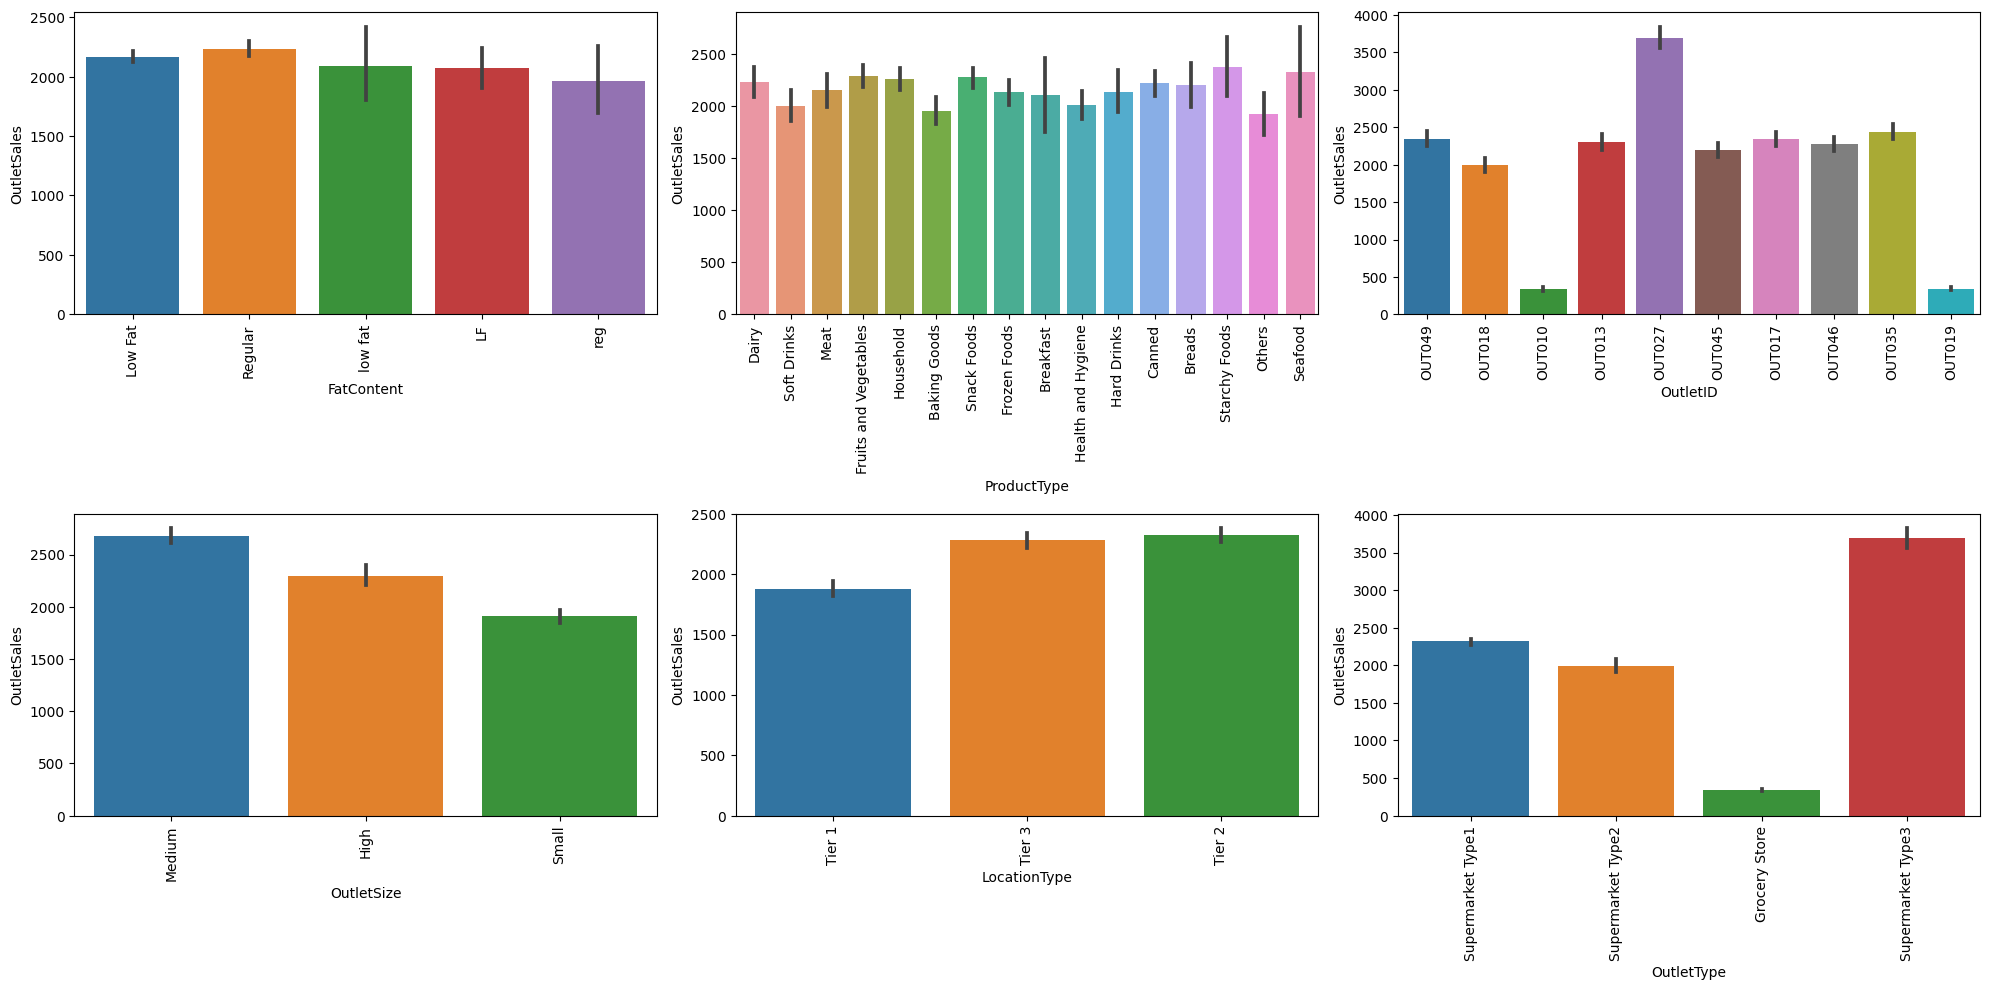

In [6]:
# categorial vaiables to plot
categorical_vars=['FatContent','ProductType','OutletID','OutletSize','LocationType','OutletType']

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()
# creating barcharts for each categorical variable
for i,var in enumerate(categorical_vars):
    print(i,var)
    sns.barplot(x=var,y='OutletSales',data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

0 Weight
1 ProductVisibility
2 MRP


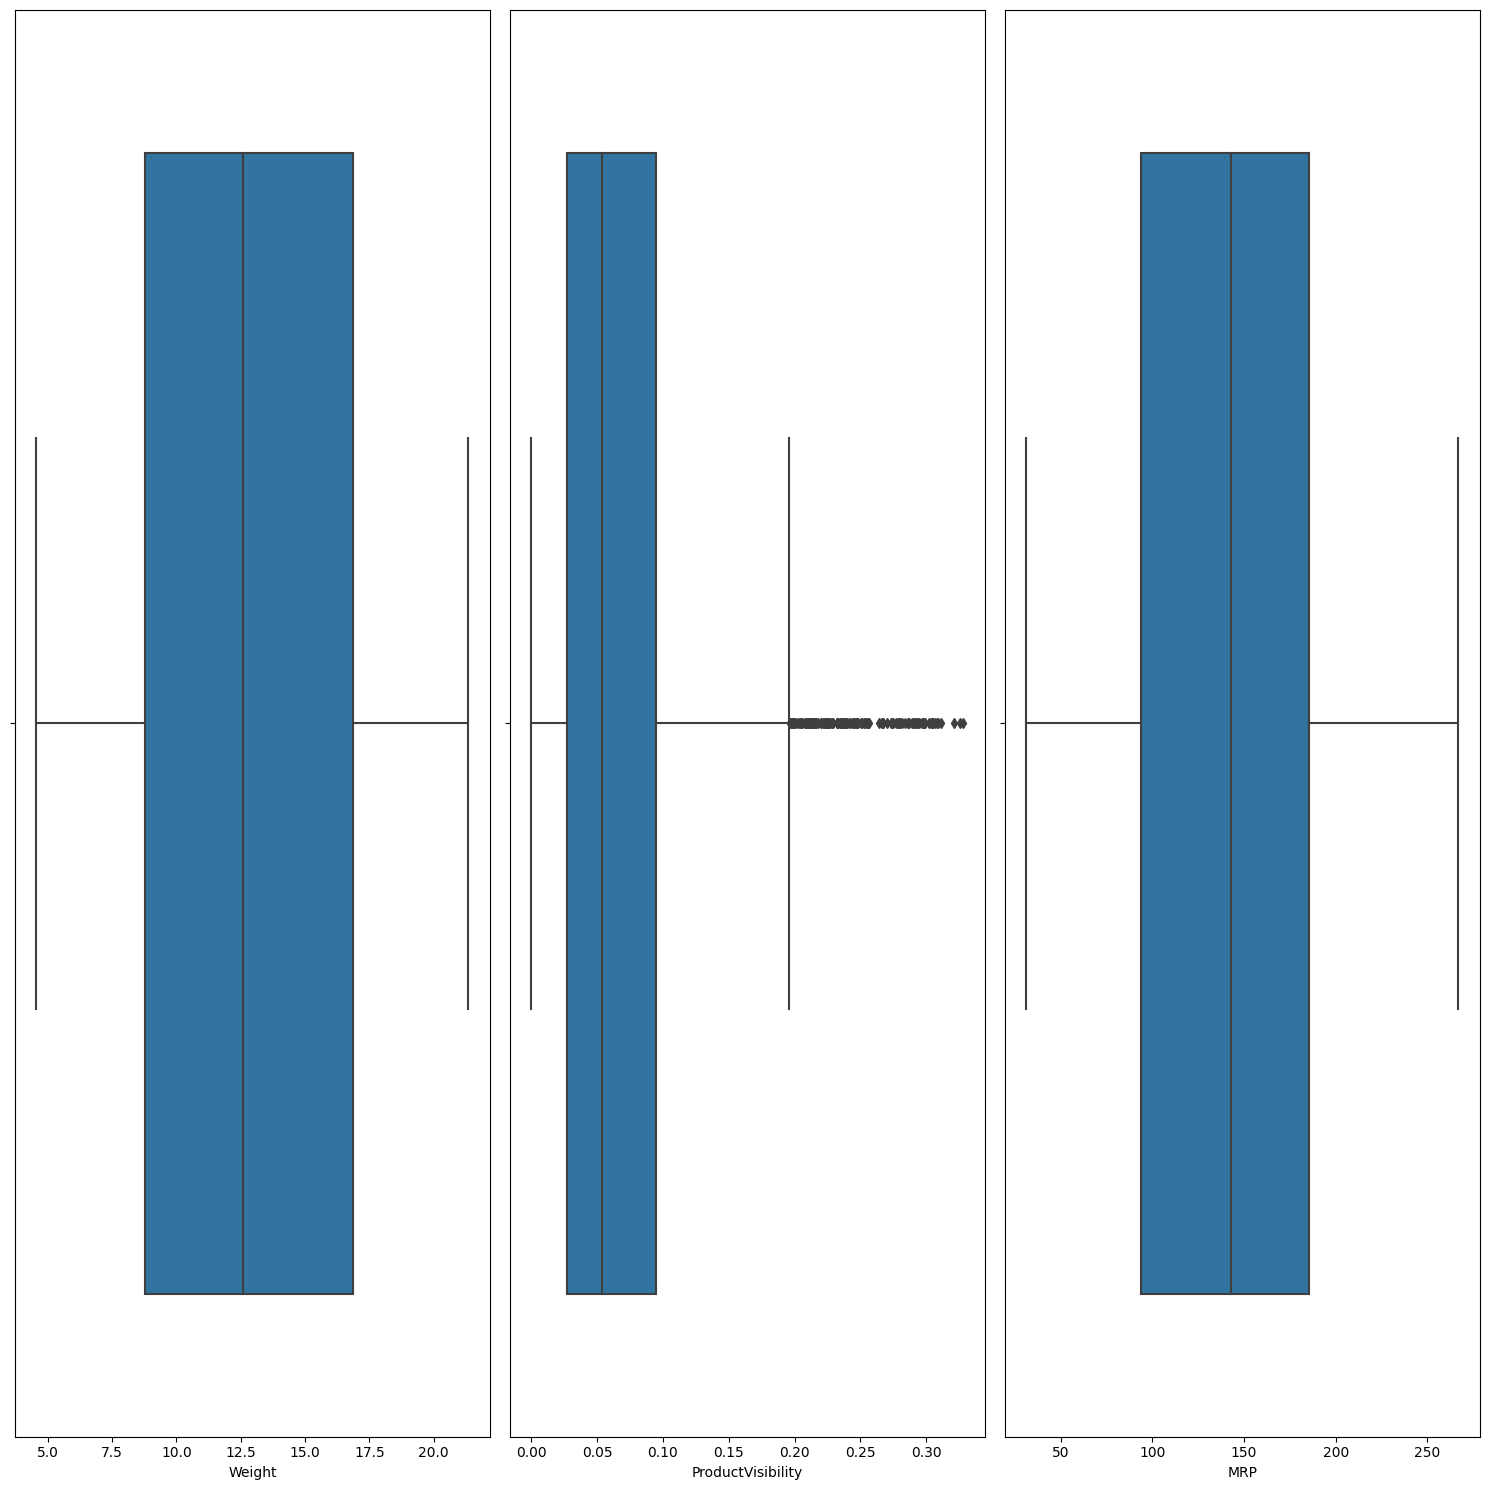

In [7]:
num_vars=['Weight','ProductVisibility','MRP']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,15))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    print(i,var)

    sns.boxplot(x=var,data=df,ax=axs[i])
plt.tight_layout()
plt.show()

0 Weight
1 ProductVisibility
2 MRP


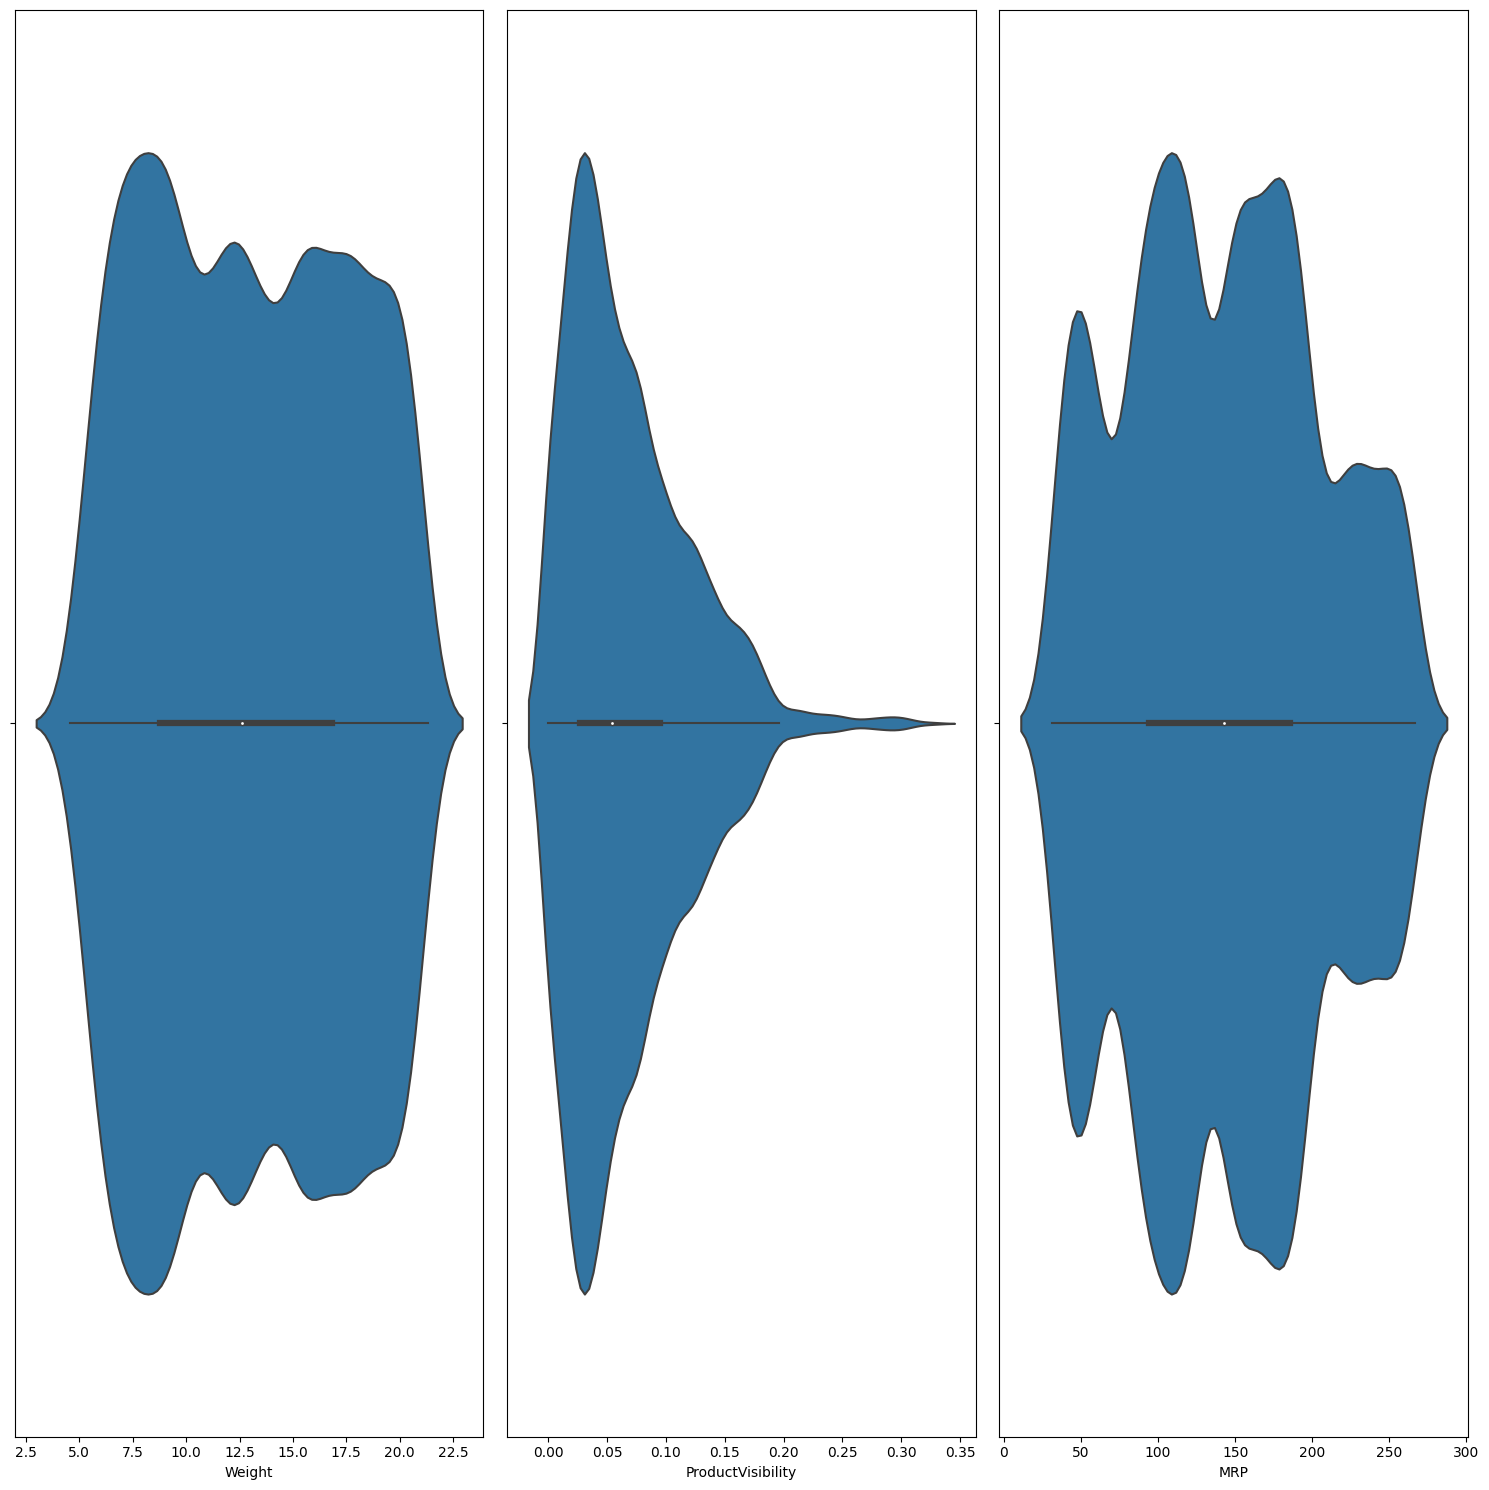

In [8]:
num_vars=['Weight','ProductVisibility','MRP']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,15))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    print(i,var)

    sns.violinplot(x=var,data=df,ax=axs[i])
plt.tight_layout()
plt.show()

0 Weight
1 ProductVisibility
2 MRP


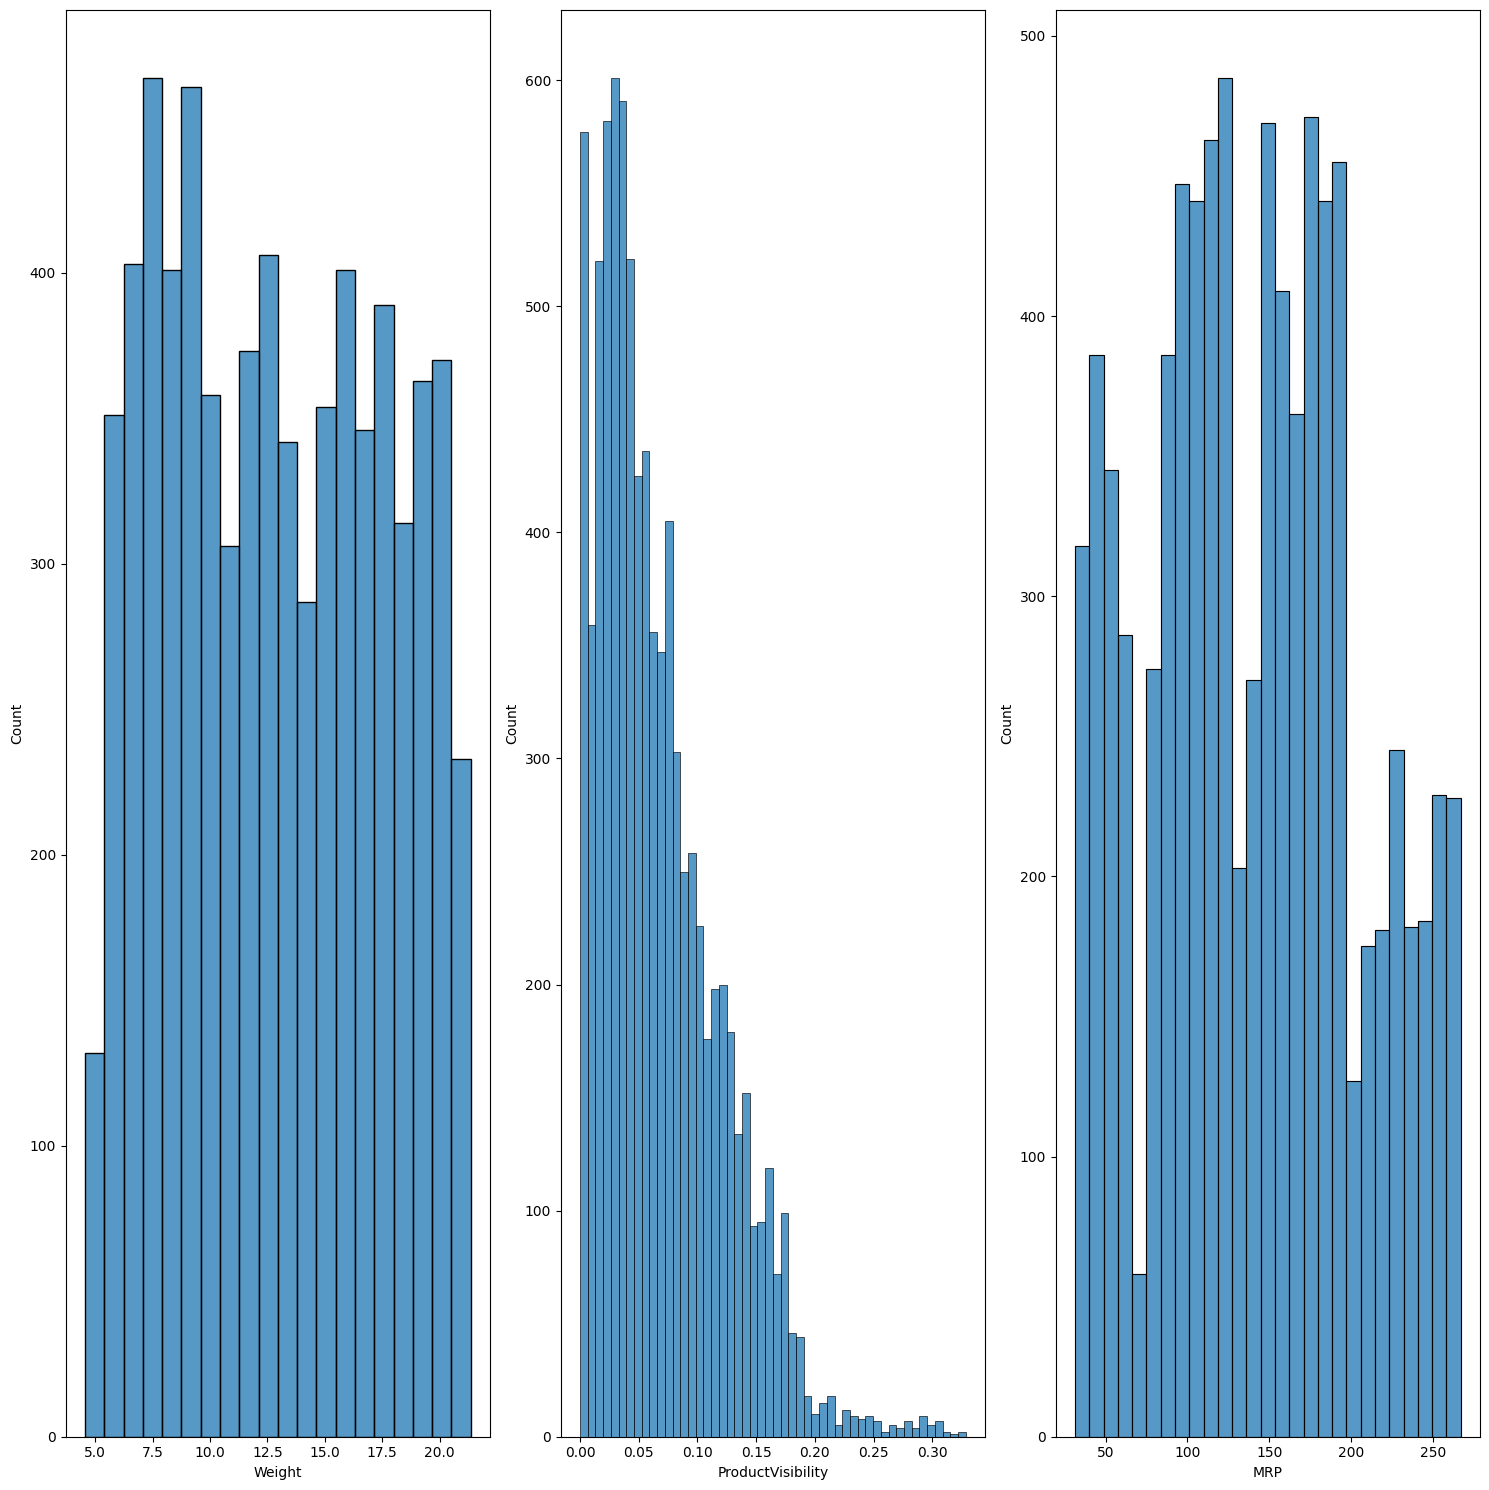

In [9]:
num_vars=['Weight','ProductVisibility','MRP']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,15))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    print(i,var)

    sns.histplot(x=var,data=df,ax=axs[i])
plt.tight_layout()
plt.show()

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

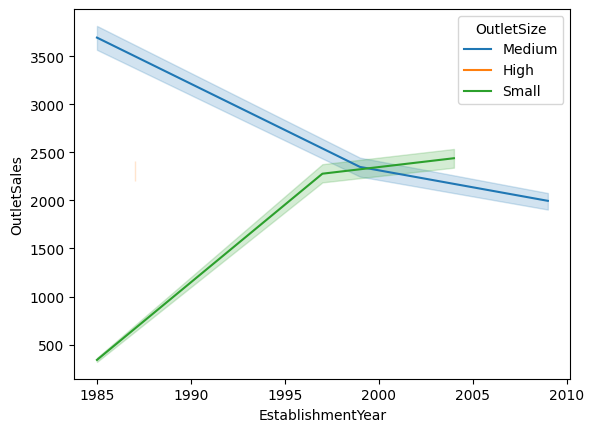

In [10]:
sns.lineplot(data=df,x='EstablishmentYear',y='OutletSales',hue='OutletSize')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

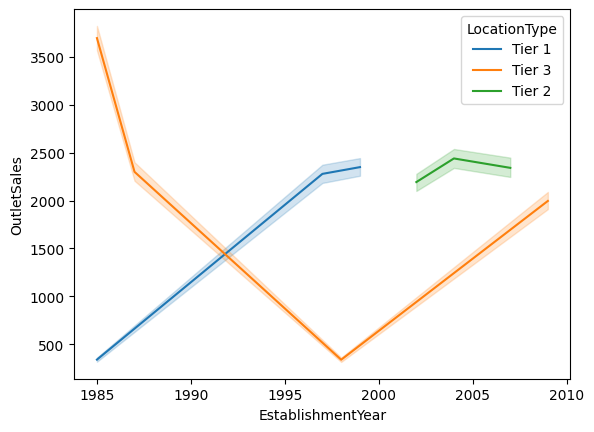

In [11]:
sns.lineplot(data=df,x='EstablishmentYear',y='OutletSales',hue='LocationType')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

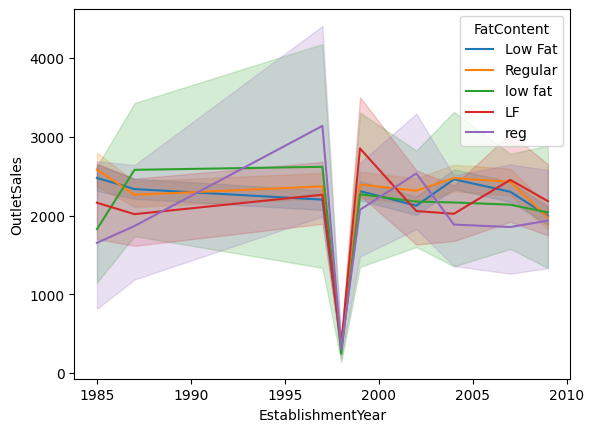

In [12]:
sns.lineplot(data=df,x='EstablishmentYear',y='OutletSales',hue='FatContent')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

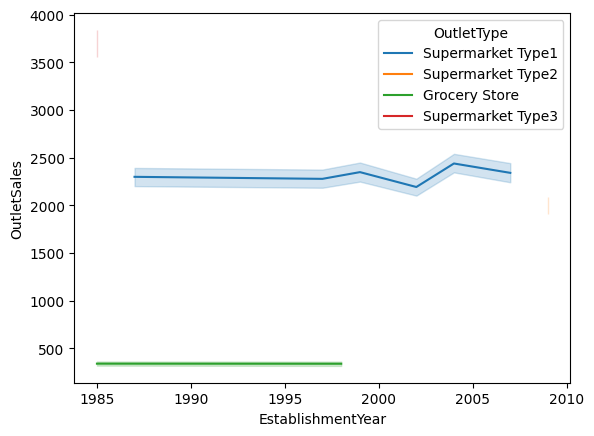

In [13]:
sns.lineplot(data=df,x='EstablishmentYear',y='OutletSales',hue='OutletType')

In [14]:
df.isnull().sum()

Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [15]:
df.Weight=df.Weight.fillna(df.Weight.mean())

In [16]:
df.dropna(subset=['OutletSize'],inplace=True)

In [17]:
df.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [18]:
df.select_dtypes(include=['object'])

,FatContent,ProductType,OutletID,OutletSize,LocationType,OutletType
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...
8517,reg,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [19]:
df.select_dtypes(include=['object']).columns

Index(['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [20]:
#Label Encoding
#Loop over column where column type is object
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:{df[col].unique()}")

FatContent:['Low Fat' 'Regular' 'low fat' 'reg' 'LF']
ProductType:['Dairy' 'Soft Drinks' 'Meat' 'Household' 'Baking Goods' 'Snack Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Frozen Foods' 'Canned' 'Starchy Foods' 'Breads' 'Others' 'Seafood']
OutletID:['OUT049' 'OUT018' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
OutletSize:['Medium' 'High' 'Small']
LocationType:['Tier 1' 'Tier 3' 'Tier 2']
OutletType:['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


In [21]:
from sklearn import preprocessing

#Loop over column where column type is object
for col in df.select_dtypes(include=['object']).columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}:{df[col].unique()}")

FatContent:[1 2 3 4 0]
ProductType:[ 4 14 10  9  0 13  6  2  8  7  5  3 15  1 11 12]
OutletID:[6 1 0 3 5 4 2]
OutletSize:[1 0 2]
LocationType:[0 2 1]
OutletType:[1 2 3 0]


Removing outliers

In [22]:
df.shape

(6113, 11)

In [23]:
col_names=['ProductVisibility']
# removing outliers using IQR method

for col_name in col_names:
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df=df[~((df[col_name]<(Q1-1.5*IQR))| (df[col_name]>(Q3+1.5*IQR)))]
    

In [24]:
df.shape

(6032, 11)

<Axes: >

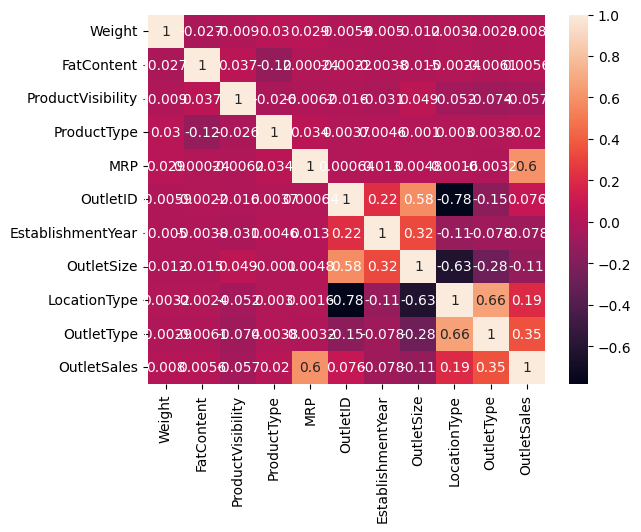

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
x=df.drop(columns=['OutletSales'])
y=df.OutletSales

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeRegressor()
param_grid={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt','log2']
}

grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `ma

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}


e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}


In [30]:
dtree=DecisionTreeRegressor(max_depth=6,max_features='auto',min_samples_leaf=1,min_samples_split=6,random_state=0)
dtree.fit(x_train,y_train)

e:\Python\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=6,
                      random_state=0)

In [47]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred=dtree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print(f'MAE is {mae}')
print(f'mape is {mape}')
print(f'mse is {mse}')
print(f'r2 is {r2}')
print(f'rmse is {rmse}')




MAE is 798.2683691806942
mape is 0.5338303088398323
mse is 1248293.7449279893
r2 is 0.5946820467789016
rmse is 1117.270667711271


In [33]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/ee/60/db3416646efc5d6e2c27f75b30bdda9c77d54dad44a5fbb1fe888a2a958b/shap-0.42.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/e8/1c/5d65ac922a4f9a6f90a10207b818e22e4d48a782af6574a6e7a50fae074d/numba-0.58.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/14/3b/f9665a46486f70a7cbb6237308e49e18ed42e4763f4e92e92cd37ea67ead/llvmlite-0.41.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/462.3 kB ? eta -:--:--
   ------------------- -------------------- 225.3/462.3 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 462.3/462.3 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.6 MB 14.4 MB/

In [34]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


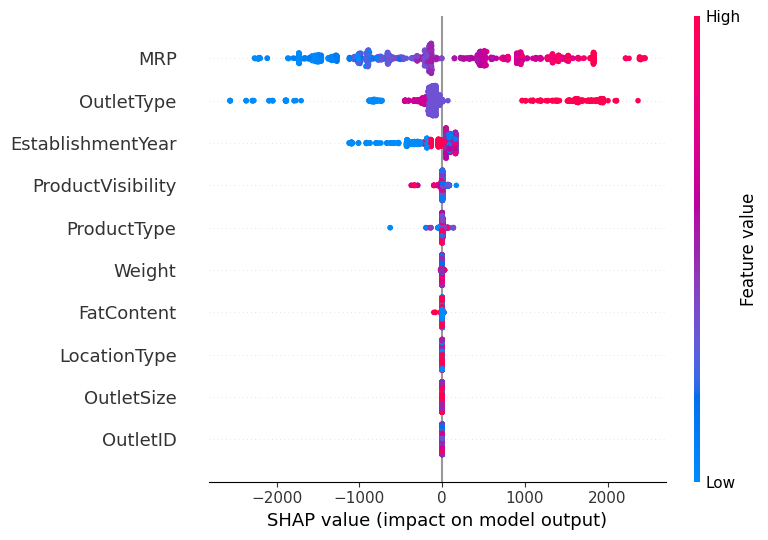

In [35]:
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

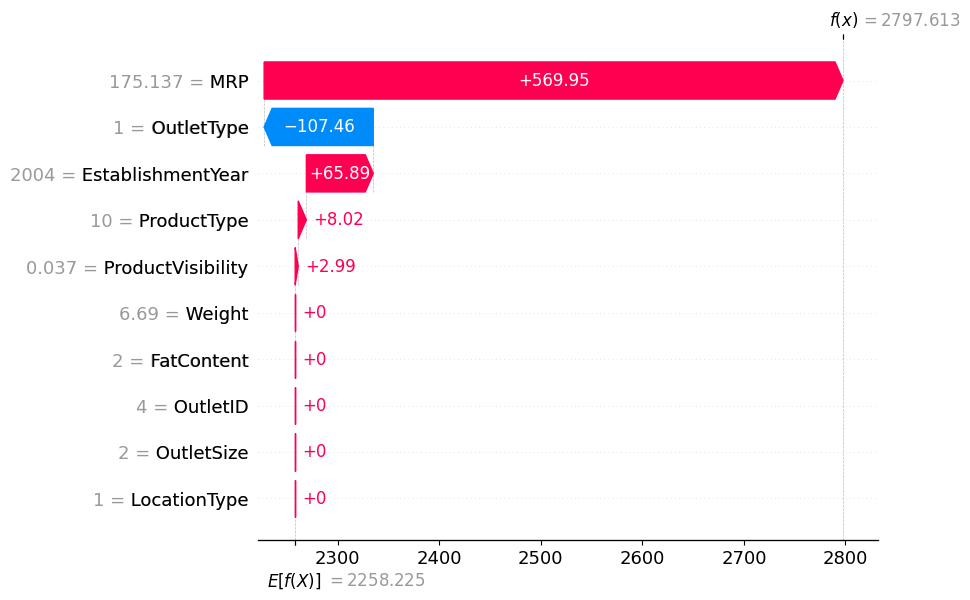

In [37]:
explainer=shap.Explainer(dtree,x_test)
shap_values=explainer(x_test)
shap.plots.waterfall(shap_values[0])

Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV

In [39]:
rf=RandomForestRegressor()

param_grid={
    'max_depth':[3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_sample_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}

In [42]:
gride_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print("Best Hyperparameters", grid_search.best_params_)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

Best Hyperparameters {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


In [43]:
rf=RandomForestRegressor(random_state=0,max_depth=6,min_samples_split=6,min_samples_leaf=1,max_features='auto')
rf.fit(x_train,y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=6, max_features='auto', min_samples_split=6,
                      random_state=0)

In [48]:
y_pred=rf.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print(f'MAE is {mae}')
print(f'mape is {mape}')
print(f'mse is {mse}')
print(f'r2 is {r2}')
print(f'rmse is {rmse}')

MAE is 795.985040281412
mape is 0.5375140730988693
mse is 1239764.0859294205
r2 is 0.5974516063805747
rmse is 1113.4469389824646


XGBoost Regressor

In [50]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 5.9 MB/s eta 0:00:17
   ---------------------------------------- 0.8/99.7 MB 8.4 MB/s eta 0:00:12
    --------------------------------------- 1.3/99.7 MB 9.5 MB/s eta 0:00:11
    --------------------------------------- 1.9/99.7 MB 10.0 MB/s eta 0:00:10
    --------------------------------------- 2.4/99.7 MB 10.4 MB/s eta 0:00:10
   - -------------------------------------- 3.0/99.7 MB 11.2 MB/s eta 0:00:09
   - -------------------------------------- 3.5/99.7 MB 10.7 MB/s eta 0:00:09
   - -------------------------------------- 4.1/99.7 MB 10.8 MB/s eta 0:00:09
   - -------------------------------------- 4.6/99.7 MB 11.3 MB/s eta 0:00:09
   -- --------------------

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import  GridSearchCV

In [52]:
xgb=XGBRegressor()
param_grid={
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5],
    'learning_rate':[0.1,0.01,0.001],
    'gamma':[0,1,5]
}

In [53]:
grid_search=GridSearchCV(xgb,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print("Best Hyperparameters", grid_search.best_params_)

Best Hyperparameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}


In [54]:
xgb=XGBRegressor(gamma=0,learning_rate=0.1,max_depth=3,min_child_weight=3)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred=xgb.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print(f'MAE is {mae}')
print(f'mape is {mape}')
print(f'mse is {mse}')
print(f'r2 is {r2}')
print(f'rmse is {rmse}')

MAE is 801.3728669237588
mape is 0.5445070284728614
mse is 1263738.0651909658
r2 is 0.5896673134252214
rmse is 1124.1610494902257
